# PHYS 481 Assignment 3: ODEs
## Due: Sept 26 before class starts


This assignment will introduce some ODE techniques. This material is discussed in Chapters 22 and 23 of https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html . Please use only numpy and matplotlib (not scipy). Remember to write an introduction [2 pts] and conclusion [2 pts].

In [2]:
# Load standard libraries for numerical methods and plotting.
# This same block will start almost every assignment in PHYS 481.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction
------------
<span style="color:palevioletred;"> In this assignment, we will explore Ordinary Differenntial Equations (ODEs) and we will also investigate various numerical techniques techniques to solve them. First, we will attempt to convert a second-order ODE into a set of first-order ODEs and employ Euler's and RK4 methods to perform numerical integration and commparing the results with an analytical solution. Then we will tackle a boundary value problem, employing the shooting method  and finite difference method, again comparing the results. Finally, we will try to apply all of these numerical skills to determine the deflection of a 1-D beam under specific load and boundary conditions.Through these progressive challenges, we aim to enhance our proficiency in numerically solving ODEs while gaining valuable insights into their real-world applications.

## Question 1

a. For the equation $y''+\sin⁡(t)+1=0$ write down the set of first-order ODEs in terms of the state vector $S=[y,y']^T$ (see notes, or chapter 22). This is only about 1 or 2 lines. (Don't overthink this!)

<span style="color:dimgray;"> Explanation: This is similar to solving a system of equations in linear algebra $I$ where you find the leading variables then isolate. Now, let S$_1$ be $y$ and let S$_2$ be $y'$ which means that if we write $(y)'=y'$ then we can rewrite it as $(S_1)'=S_2$ giving us our first equation. If $y'' = (y')' \equiv (S_2)'$ we can get our second equation by plugging and isolating for $S_2' = -sin(t)-1$.

<span style="color:palevioletred;"> Equation 1) $S_1' = S_2$

<span style="color:palevioletred;"> Equation 2) $S_2' = -sin(t)-1$

b. 	Write a general function to integrate second-order ODEs using Euler’s method. The function should accept a function $F=dS/dt$ (which depends on S and t), an interval, an initial value vector S and a number of steps to integrate. It should return the step points $x_n$ and the solution to the ODE $y_n$ at all the step points. Use it to integrate the ODE from part a on the interval $[0,\pi/2]$ with the initial values $y(0)=0$ and $y' (0)=1$. Compare the results using different numbers of steps and compare to the analytic result $y=c_1+c_2 x-x^2/2+\sin⁡(x)$.

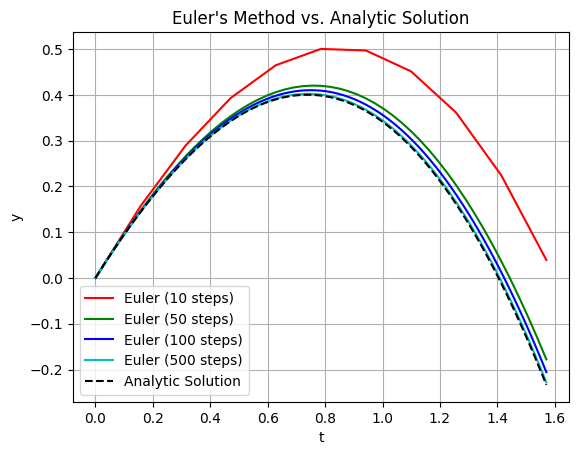

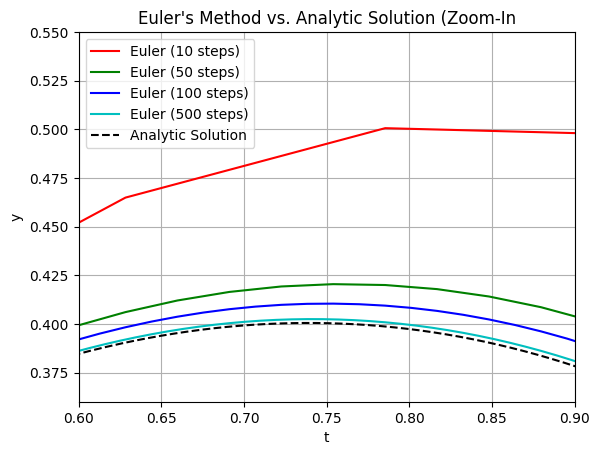

In [3]:
# Question 1b

# Define initial conditions and integration parameters
initial_conditions = np.array([0.0, 1.0])    # y(0) = 0, y'(0) = 1
interval = [0, np.pi/2]                      # Creating the values for [a, b]
num_steps_list = [10, 50, 100, 500]          # Creating list for testing 3 different number of steps
custom_colors = ['r', 'g', 'b', 'c']         # Define custom colors for the plots

def F_q1(S, t):
    '''This is the function F (dS/dt) for question 1.
    The function should accept the state vector S=transpose([y,y']) and the independent variable t (time).
    It should return a numpy array with the the derivative dS/dt for the ODE in question 1.

    Args:
    - S (array): This is the state vector representing [y, y'].
    - t (float): The independent variable representing time.

    Return: An array with two elements
    - The first derivative of y, d(y)/dt
    - The second derivative of y, d(y')/dt = d(y)^2/dt^2.
    '''

    S1_dot = S[1]
    S2_dot = -np.sin(t) - 1
    return np.array([S1_dot, S2_dot])

def ODE_integrate_Euler(F, interval, S0, n_steps):
    '''This function integrates the second-order ODE d^2y/dt^2=f(y,y',t) in the form dS/dt=F(S,t) where S=transpose([y,y']) 
    using Euler's method. It accepts the function F(S,t), the interval on which to solve, the initial value S0 and the number 
    of steps to use. If returns y and t at every step.

    Args:
    - F(S, t): Defines the system of first-order ODEs.
    - Interval (list): Small list containing a and b that specify the integration interval [a,b].
    - S0 (array): The initial value vector, y(0)=0 and y'(0)=1 at t=a.
    - n_steps (integer): The number of steps for the integration.

    Return:
    - A tuple (t, y) containing the arrays of time points (t) and the corresponding solution vectors (y) at each time point.
    '''

    a, b = interval         # Obtain values from interval list
    h = (b - a) / n_steps   # Step size obtained by dividing interval over number of steps

    # Initialize arrays to store results
    t = np.linspace(a, b, n_steps + 1)
    y = np.zeros((n_steps + 1, len(S0)))

    y[0] = S0               # Initial values

    # Perform Euler's method integration
    for i in range(n_steps):
        y[i + 1] = y[i] + h * F(y[i], t[i])  # Here is where F_q1() gets its parameters.
    return t, y


def analytic_solution(t):
    '''Analytic solution from the assignment question. Simply takes in array for time and uses it to calculate solution.
        - Applying the initial condition y(0)=0 we get 0 = c1 + c2(0) - 0^2/2 + sin(0) giving us c_1 = 0
        - Applying the initial condition y'(0)=1 we get 1 = c1 - 0 + cos(0) giving us c_2 = 0
    The following equation uses these values for c1=0 and c2=0!
    '''
    return 0 + 0*t - t**2 / 2 + np.sin(t)


def compare_euler(F, interval, S0, n_steps_list):
    '''
    Performs Euler integration for different step sizes and compares the results to the analytic solution. Also does all the
    plotting for the anaylytical solution and the resulting solutions using RK4.

    Args:
    - F(S, t): Defines the system of first-order ODEs.
    - interval (list): A list [a, b] specifying the integration interval [a, b].
    - S0 (array): The initial value vector, y(0)=0 and y'(0)=1 at t=a.
    - num_steps_list (list): A list of integers representing different numbers of steps to use.

    Note: 'enumerate' adds a counter to an already established loop. This is done to make custom colours for our graphs
    since num_steps_list is the 3 different arbitrarily choosen steps at the top of the cell when we need 1,2,3,4.
    '''

    # Perform Euler's method integration for different step sizes and compare to the analytic result.
    # Note: Here F_q1 is a function being called inside a function like we talked about in class. It gets its
    # paramaters later when inside the ODE_integrate_Euler() function.
    for i, num_steps in enumerate(num_steps_list):
        t_vals, y_vals = ODE_integrate_Euler(F_q1, interval, initial_conditions, num_steps)
        plt.plot(t_vals, y_vals[:, 0], label=f'Euler ({num_steps} steps)', color=custom_colors[i])

    # Generate analytical solution by obtaining t and y values that we need to plot it
    t_analytic = np.linspace(interval[0], interval[1], 1000)    # This is an array of evenly space time intervals
    y_analytic = analytic_solution(t_analytic)                  # Analytical solutions of y at each time interval

    # Plot the analytical solution
    plt.plot(t_analytic, y_analytic, label='Analytic Solution', linestyle='--', color='black')

    # Plotting all the newly generate functions including analytic and euler method ones
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.title('Euler\'s Method vs. Analytic Solution')
    plt.grid(True)
    plt.show()

    # Create a second plot with custom xlim and ylim values

    # Perform Euler's method integration for different step sizes and plot the results (plot with custom xlim and ylim)
    for i, num_steps in enumerate(num_steps_list):
        t_vals, y_vals = ODE_integrate_Euler(F_q1, interval, initial_conditions, num_steps)
        plt.plot(t_vals, y_vals[:, 0], label=f'Euler ({num_steps} steps)', color=custom_colors[i])

    plt.plot(t_analytic, y_analytic, label='Analytic Solution', linestyle='--', color='black')

    # Add labels and legends for the plot with custom xlim and ylim
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.title('Euler\'s Method vs. Analytic Solution (Zoom-In')
    plt.grid(True)
    
    # Set custom xlim and ylim values for the second plot to zoom-in
    plt.xlim(0.60, 0.90)
    plt.ylim(0.36, 0.55)
    plt.show()

# Call the compare_euler function to perform integration and plot the results
compare_euler(F_q1, interval, initial_conditions, num_steps_list)

c.	Repeat part b but use RK4 integration instead of Euler’s method.

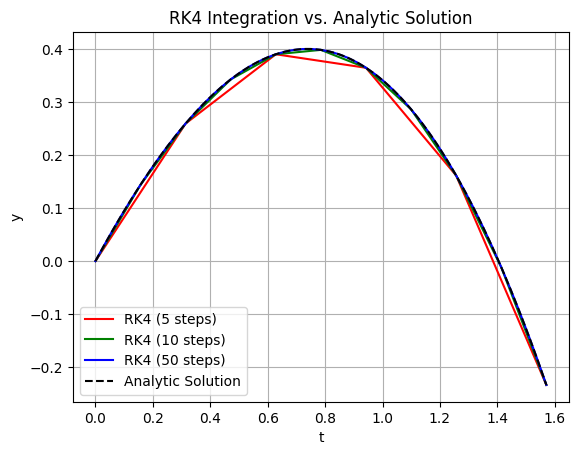

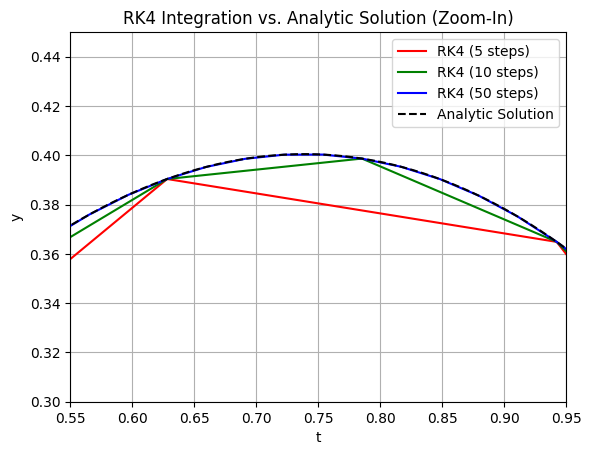

In [5]:
# Define initial conditions and integration parameters for question 1c. Right now some are the same as before in 1.b 
# but we're having it here so we can adjust these values for this specific question only.
initial_conditions = np.array([0.0, 1.0])   # y(0) = 0, y'(0) = 1
interval = [0, np.pi/2]                     # Creating the values for [a, b]
num_steps_list = [5, 10, 50]               # Creating list for testing 3 different numbers of steps
custom_colors = ['r', 'g', 'b', 'c']         # Define custom colors for the plots

def ODE_integrate_RK4(F, interval, S0, n_steps):
    '''
    This function integrates the second-order ODE d^2y/dt^2=f(y,y',t) in the form dS/dt=F(S,t) where S=transpose([y,y']) using RK4 (4th order Runge-Kutta).
    It accepts the function F(S,t), the interval on which to solve, the initial value S0 and the number of steps to use.
    If returns y and t at every step.
    '''

    a, b = interval         # Obtain values from interval list
    h = (b - a) / n_steps   # Step size obtained by dividing interval over number of steps

    # Initialize arrays to store results
    t = np.linspace(a, b, n_steps + 1)
    y = np.zeros((n_steps + 1, len(S0)))

    y[0] = S0               # Initial values

    # Perform RK4 integration
    for i in range(n_steps):
        S = y[i]            # Current state vector
        t_i = t[i]          # Current time for each time step specifically

        # Calculate the four intermediate values (k1, k2, k3, k4)
        k1 = h * F(S, t_i)
        k2 = h * F(S + 0.5 * k1, t_i + 0.5 * h)
        k3 = h * F(S + 0.5 * k2, t_i + 0.5 * h)
        k4 = h * F(S + k3, t_i + h)

        # Update the solution using the weighted sum of intermediate values
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t, y


def compare_rk4(F, interval, S0, n_steps_list):
    '''
    Performs RK4 integration for different step sizes and compares the results to the analytic solution. Also does all the
    plotting for the anaylytical solution and the resulting solutions using RK4.

    Args:
    - F(S, t): Defines the system of first-order ODEs.
    - interval (list): A list [a, b] specifying the integration interval [a, b].
    - S0 (array): The initial value vector, y(0)=0 and y'(0)=1 at t=a.
    - num_steps_list (list): A list of integers representing different numbers of steps to use.

    Note: 'enumerate' adds a counter to an already established loop. This is done to make custom colours for our graphs
    since num_steps_list is the 3 different arbitrarily choosen steps at the top of the cell when we need 1,2,3,4.
    '''

    # Perform RK4 integration for different step sizes and plot the results
    for i,num_steps in enumerate(num_steps_list):
        t_vals, y_vals = ODE_integrate_RK4(F, interval, S0, num_steps)
        plt.plot(t_vals, y_vals[:, 0], label=f'RK4 ({num_steps} steps)', color=custom_colors[i])

    # Generate the analytical solution
    t_analytic = np.linspace(interval[0], interval[1], 1000)
    y_analytic = analytic_solution(t_analytic)

    # Plot the analytical solution
    plt.plot(t_analytic, y_analytic, label='Analytic Solution', linestyle='--', color='black')

    # Plotting all the newly generate functions including analytic and RK4 method ones
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.title('RK4 Integration vs. Analytic Solution')
    plt.grid(True)
    plt.show()

#Create a second plot with custom xlim and ylim values for zooming in
    
    # Perform RK4 integration for different step sizes and plot the results (plot with custom xlim and ylim)
    for i,num_steps in enumerate(num_steps_list):
        t_vals, y_vals = ODE_integrate_RK4(F, interval, S0, num_steps)
        plt.plot(t_vals, y_vals[:, 0], label=f'RK4 ({num_steps} steps)', color=custom_colors[i])

    plt.plot(t_analytic, y_analytic, label='Analytic Solution', linestyle='--', color='black')

    # Add labels and legends for the plot with custom xlim and ylim
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.title('RK4 Integration vs. Analytic Solution (Zoom-In)')
    plt.grid(True)
    
    # Set custom xlim and ylim values for the second plot
    plt.xlim(0.55, 0.95)
    plt.ylim(0.3, 0.45)
    plt.show()

# Call the perform_rk4_integration function to perform integration and plot the results
compare_rk4(F_q1, interval, initial_conditions, num_steps_list)

d.	Discuss the results.

-----------------

<span style="color:palevioletred;"> 1b) Euler's Method - In this analysis it is evident that Euler's method is simple to implement but exhibits limited accuracy when dealing with ODE's involving rapidly changing functions. When using a small number of steps (e.g. 10) Euler's method yields relatively inaccurate results compared to the analytical solution. You may also notice that it is more jagged in appearance due to the little amount of steps it actually takes to complete the approximation. When increasing the number of steps (e.g. 100) it certainly yields more accurate results with a smoother line but still struggles to capture the full solution since it is still off from the analytical solution. Even if we were to greatly increase the number of steps (e.g. 500) it still struggles to give a close approximation. It seems as though the more accurate the results, the exponentially harder it is to obtain. This can be attributed to the fact that Euler's method has a global error that accumulates over time. This means that for larger intervals, even with many steps, the accuracy may degrade over time.

<span style="color:palevioletred;"> 1c) RK4 Integration - RK4 shines in terms of accuracy and versatility even though it's not as easy to implement as Euler's method. As the higher-rder method, RK4 provides more precise approximations to the solution, even with a smaller number of steps. This is clearly demonstrated that we get significantly more accurate results when RK4 uses 50 steps than when Euler uses 500 steps. While hte choie of step size still matters, RK4 is less sensitive to step size than Euler's method and thus can yield more accurate results with a relatively larger step size. All this shows that RK4 is superior for solving ODEs with high accuracy requirements.



## Question 2

a. For  the same ODE as in question 1 and the boundary values $y(0)=0$ and $y(\pi/2)=1$, use a shooting method to solve the equation on the interval $[0,\pi/2]$. Compare to the analytic result.

For a second order ODE in the form

$$F\left(x,y(x),\frac{dy(x)}{dx}\right)=\frac{d^2 y(x)}{dx^2}$$

where we are given boundary conditions $y(0)=0$ and $y(\frac{\pi}{2})=1$, we can use a shooting method to solve the ODE. The idea is to guess a value for $y'(0)$ - we can then turn the problem into an IVP with two conditions on $y=0$. This is the 'aiming' stage. 


Next is the 'shooting' stage, where we integrate to the other boundary using the Runge-Kutta method implemented above and compare the result to the boundary condition (in this case $y(\frac{\pi}{2})=1$). Our first guess is unlikely to be correct, so we will iterate using a bisection method to find the correct value of $y'(0)$.
 


Note: since we'll want to check the performance of our shooting method against the analytical solution, we'll need to create a new function to generate the analytic solution for the new boundary conditions. Following the same procedure as before, we integrate the ODE twice, leaving us with

$$y(t)=c_1 + c_2 t - \frac{t^2}{2}+\sin(t)$$

and the system of equations 

$$\begin{cases}
y(0)=0, \\ 
y(\frac{\pi}{2})=1

\end{cases}$$


from which we can determine that $c_1$ will be $0$ as before, but now $c_2$ gives us

$$1=c_1 + c_2 \left(\frac{\pi}{2}\right)-\frac{\pi^2}{8}+1$$

which simplifies to 

$$c_2 = \frac{\pi}{4}$$

Iteration 0: y'(0) = 0.0, error = 2.8044968770276903
Iteration 1: y'(0) = 2.5, error = 1.1224939399595533
Iteration 2: y'(0) = 1.25, error = 0.8410014685340694
Iteration 3: y'(0) = 1.875, error = 0.14074623571274159
Iteration 4: y'(0) = 1.5625, error = 0.3501276164106636
Iteration 5: y'(0) = 1.71875, error = 0.10469069034896039
Iteration 6: y'(0) = 1.796875, error = 0.018027772681891152
Iteration 7: y'(0) = 1.7578125, error = 0.04333145883353484
Iteration 8: y'(0) = 1.77734375, error = 0.012651843075822122
Iteration 9: y'(0) = 1.787109375, error = 0.0026879648030342373
Iteration 10: y'(0) = 1.7822265625, error = 0.004981939136394775
Iteration 11: y'(0) = 1.78466796875, error = 0.0011469871666793807
Iteration 12: y'(0) = 1.785888671875, error = 0.0007704888181778724
Iteration 13: y'(0) = 1.7852783203125, error = 0.0001882491742514203
Iteration 14: y'(0) = 1.78558349609375, error = 0.00029111982196217134
Iteration 15: y'(0) = 1.785430908203125, error = 5.143532385520899e-05
Iteration 16:

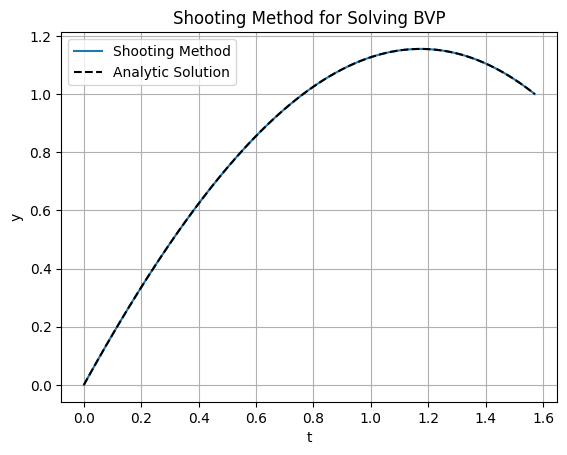

In [6]:
# Define initial conditions and integration parameters
initial_conditions = np.array([0.0, 1.0])    # y(0) = 0, y'(0) = 1
interval = [0, np.pi/2]                      # Creating the values for [a, b]

def F_q2(S, t):
    '''This is the function F (dS/dt) for question 2. It's the same as Q1 which we should look at doing something about
    The function should accept the state vector S=transpose([y,y']) and the independent variable t (time).
    It should return a numpy array with the the derivative dS/dt for the ODE in question 2.

    Args:
    - S (array): This is the state vector representing [y, y'].
    - t (float): The independent variable representing time.

    Return: An array with two elements
    - The first derivative of y, d(y)/dt
    - The second derivative of y, d(y')/dt = d(y)^2/dt^2.
    '''

    y, y_prime = S
    dydt = y_prime
    dy_prime_dt = -np.sin(t) - 1
    return np.array([dydt, dy_prime_dt])



def analytic_solution_q2(t):
    '''Analytic solution from the assignment question. Simply takes in array for time and uses it to calculate solution.
        - Applying the initial condition y(0)=0 we get 0 = c1 + c2(0) - 0^2/2 + sin(0) giving us c_1 = 0
        - Applying the boundary condition y(pi/2)=1 we get 1 = c1 + c2(pi/2) - (pi/2)^2/2 + sin(pi/2) giving us c_2 = pi/4
    The following equation uses these values for c1=0 and c2=pi/4
    '''
    c2 = (np.pi / (4))
    return c2 * t - (t**2 / 2) + np.sin(t)



def shooting_method(F, interval, y0, yf, y_prime_lower, y_prime_upper, tol=1e-6, max_iter=100):
    '''
    Implements the shooting method to solve a boundary value problem (BVP) of the form y'' = f(y, y', t) with given boundary conditions.
    
    Args:
    - F(S, t): Function defining the system of first-order ODEs, where S = [y, y'].
    - interval (list): A list [a, b] specifying the integration interval [a, b].
    - y0 (float): The initial value of the function y(a).
    - yf (float): The target value of the function y(b).
    - y_prime_lower (float): Lower bound for the initial guess of y'(a).
    - y_prime_upper (float): Upper bound for the initial guess of y'(a).
    - tol (float, optional): The tolerance level for the error. Defaults to 1e-6.
    - max_iter (int, optional): The maximum number of iterations for the bisection method. Defaults to 100.
    
    Returns:
    - t_vals (array): Array of time points where the solution was evaluated.
    - y_vals (array): Array of function values corresponding to t_vals.
    
    Note:
    The function uses the bisection method to iteratively adjust the initial guess for y'(a) until the solution meets the boundary condition y(b) = yf within the specified tolerance.
    '''
    
    # Define interval endpoints
    a, b = interval
    
    # Initialize iteration counter and error
    iter_count = 0
    error = np.inf
    
    while error > tol and iter_count < max_iter:
        # Compute midpoint for the guess
        y_prime_guess = 0.5 * (y_prime_lower + y_prime_upper)
        
        # Solve IVP using RK4
        t_vals, y_vals = ODE_integrate_RK4(F, interval, [y0, y_prime_guess], 100)
        
        # Check how close we are to the target boundary condition
        y_final = y_vals[-1, 0]
        error = np.abs(y_final - yf)

        # Print out the current iteration and error
        print(f'Iteration {iter_count}: y\'(0) = {y_prime_guess}, error = {error}')
        
        
        # Update guesses using bisection method
        if y_final < yf:
            y_prime_lower = y_prime_guess
        else:
            y_prime_upper = y_prime_guess
            
        # Increment iteration counter
        iter_count += 1

    return t_vals, y_vals[:, 0]


# Initial and final values for y
y0 = 0.0
yf = 1.0

# Interval and initial guesses for y'(0)
interval = [0, np.pi/2]
y_prime_lower = -5
y_prime_upper = 5

# Run the shooting method
t_vals, y_vals = shooting_method(F_q2, interval, y0, yf, y_prime_lower, y_prime_upper)

# Plot numerical solution
plt.plot(t_vals, y_vals, label='Shooting Method')
# Plot analytical solution
t_analytic = np.linspace(interval[0], interval[1], 1000)
y_analytic = analytic_solution_q2(t_analytic)
plt.plot(t_analytic, y_analytic, label='Analytic Solution', linestyle='--', color='black')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Shooting Method for Solving BVP')
plt.grid(True)
plt.show()


b.	Repeat question a using a finite difference method with a varying number of grid points (5,10,20,50).

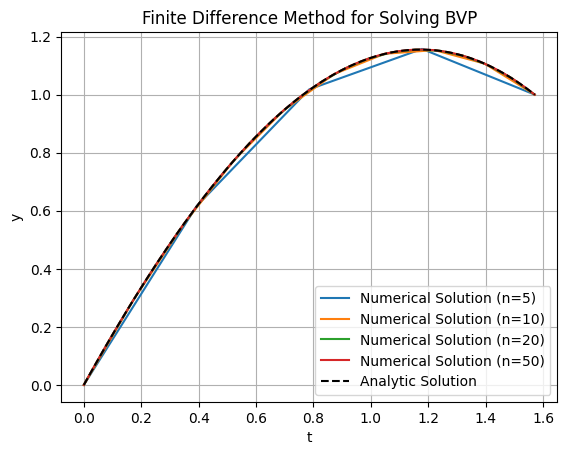

In [8]:

def finite_difference_method(n):
    """
    Implements the finite difference method to solve a boundary value problem (BVP) of the form y'' = f(y, y', t) with given boundary conditions. This uses the matrix approach to solve systems of linear equations
    as discussed in Chapter 14.05 (https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.05-Solve-Systems-of-Linear-Equations-in-Python.html). 

    Args:
    - n (int): The number of grid points to use.

    Returns:
    - None
    """
    a, b = 0, np.pi / 2
    h = (b - a) / (n - 1)
    t_values = np.linspace(a, b, n)

    # Step 1: Create the matrix A and vector B for the linear system A*y = B
    A = np.zeros((n, n))
    B = -np.sin(t_values) - 1

    A[0, 0] = 1  # Boundary condition y(0) = 0
    A[-1, -1] = 1  # Boundary condition y(pi/2) = 1
    B[0] = 0
    B[-1] = 1

    for i in range(1, n-1):
        A[i, i-1] = 1 / (h ** 2)
        A[i, i] = -2 / (h ** 2)
        A[i, i+1] = 1 / (h ** 2)

    # Step 2: Solve the linear system
    y_values = np.linalg.solve(A, B)

    # Step 3: Plot the numerical solutions
    plt.plot(t_values, y_values, label=f'Numerical Solution (n={n})')

# Run the finite difference method for different grid sizes
for n in [5, 10, 20, 50]:
    finite_difference_method(n)

# Plot the analytical solution
t_analytic = np.linspace(0, np.pi/2, 1000)
y_analytic = analytic_solution_q2(t_analytic)
plt.plot(t_analytic, y_analytic, label='Analytic Solution', linestyle='--', color='black')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Finite Difference Method for Solving BVP')
plt.grid(True)
plt.show()


c.	Discuss the results.





--------------------------

<span style="color:palevioletred;"> 1d) Shooting Method - The shooting method is highly versatile and particularly useful for non-linear differential equations and boundary conditions. However, its iterative nature means that precision is only achieved after multiple iterations. Each iteration involves solving an initial value problem, which can accumulate error, especially when using methods like Euler's. On the plus side, the shooting method is less memory-intensive; it only needs to store the output values and not the entire matrix of coefficients. However, its generalization to multi-dimensional problems or higher-order ODEs is not straightforward. For instance, when dealing with higher-order equations, one would need to make initial guesses for multiple derivatives, complicating the problem further.

<span style="color:palevioletred;"> 1e) Central Finite Difference Method - This method offers the advantage of being non-iterative and thus can provide precise solutions without the need for multiple runs. It directly incorporates boundary conditions and can be easily generalized to higher-order ODEs or multi-dimensional PDEs. However, this comes at the cost of memory. The method requires the storage of an $n\times n$ matrix, making it memory-intensive, especially for large $n$. It's worth noting that while increasing the number of grid points generally improves accuracy, the jump from 20 to 50 grid points did not show a visually meaningful improvement in this specific problem. This could be indicative of diminishing returns in accuracy for this particular ODE. Additionally, for nonlinear ODEs, this method can result in a nonlinear matrix equation, which may be difficult to solve.

## Question 3

The deflection $y(x)$ of a 1-D beam is governed by the following ODE:

$$EI\frac{d^2 y}{dx^2}=\frac{1}{2} \omega_0 (Lx-x^2 ) [ 1+(\frac{dy}{dx})^2 ]^{3/2}$$

where EI is a parameter known as the “flexural rigidity” that depends on the material and its cross-section, L is the length of the beam and $\omega_0$ is the load per unit length applied to the beam.
If L=5 m, $EI=1.8\times 10^7$ $\rm{Nm^2}$, $\omega_0=1.5\times10^4$ N/m and $y(0)=y(L)=0$, find the beam deflection $y(x)$ on the interval $[0,L]$.  [https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.06-Summary-and-Problems.html question 10]


Discussion for Q3

--------------------

## Conclusion